In [19]:
## Import packages
import swat
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Set options
pd.set_option('max_columns', None)

## Connect to CAS
conn = swat.CAS('server.demo.sas.com', 30571, 'student', 'Metadata0', name='py04d02')

## Function to load the loans_raw table into memory if necessary
def loadloans():
    conn.loadTable(path='loans_raw.sashdat', caslib='casuser',
                   casOut={'name':'loans_raw',
                           'caslib':'casuser',
                           'promote':True})

In [22]:
conn.dropTable('loans_raw')
loadloans()

NOTE: Cloud Analytic Services dropped table loans_raw from caslib CASUSER(student).
NOTE: Cloud Analytic Services made the file loans_raw.sashdat available as table LOANS_RAW in caslib CASUSER(student).


,ID,AccNumber,Year,Month,Day,CurrentDate,SalaryGroup,Age,Salary,EmpLength,Category,Amount,InterestRate,LoanLength,LoanGrade,LoanStatus,LastPurchase,Cancelled,CancelledReason,Promotion
0,D-00008504770449362695,M4728509150445462-42736000,2015.0,10.0,26.0,31DEC2022,"$100,001 - $250,000",25.0,139480.0,7.0,Mortgage,225321.89,3.53,30.0,A,Charged Of,NaT,0.0,,0.0
1,H-00005738609577529132,M3611185376066717-17933000,2020.0,9.0,18.0,31DEC2022,"$50,001 - $100,000",33.0,57932.0,20.0,Mortgage,145883.99,4.07,20.0,A,Current,NaT,0.0,,0.0
2,H-00005929645376745611,M7610391711350531-49111000,2016.0,3.0,16.0,31DEC2022,"$50,001 - $100,000",37.0,82527.0,9.0,Mortgage,121176.32,3.98,30.0,A,Current,NaT,0.0,,0.0
3,F-00009935246077366174,M5370376773644240-14491000,2018.0,1.0,25.0,31DEC2022,"$50,001 - $100,000",47.0,50694.0,8.0,Mortgage,103980.65,4.32,30.0,C,Default,NaT,0.0,,0.0
4,D-00004797198087908328,M5732925182674081-95158000,2017.0,11.0,20.0,31DEC2022,"$250,001-$500,000",35.0,328835.0,5.0,Mortgage,613197.49,3.63,30.0,B,Current,NaT,0.0,,0.0
5,B-00009082114498596638,M1759489045944066-77835000,2016.0,10.0,6.0,31DEC2022,"Less than $50,000",41.0,48772.0,15.0,Mortgage,72947.58,4.33,30.0,B,Current,NaT,0.0,,0.0
6,D-00003123313209507615,M0983006975147874-14490000,2021.0,8.0,4.0,31DEC2022,"$100,001 - $250,000",61.0,133630.0,4.0,Mortgage,363502.10,3.47,30.0,A,Fully Paid,NaT,0.0,,0.0
7,A-00007821538811549544,M1867101190146060-46207000,2019.0,2.0,1.0,31DEC2022,"$50,001 - $100,000",45.0,65622.0,15.0,Mortgage,165498.73,3.66,30.0,B,Current,NaT,0.0,,0.0
8,B-00008545748284086585,M0024357708171011-00676000,2018.0,6.0,19.0,31DEC2022,"$100,001 - $250,000",62.0,142487.0,16.0,Mortgage,288990.85,4.12,15.0,B,Current,NaT,0.0,,0.0
9,H-00005317958693485707,M8644566209986807-56705000,2015.0,6.0,2.0,31DEC2022,"Less than $50,000",45.0,28500.0,12.0,Mortgage,63697.07,5.19,30.0,B,Current,NaT,0.0,,0.0


Year
2013.0      379077.01
2014.0     4946375.01
2015.0     7461563.21
2016.0     7374137.13
2017.0    10815969.38
2018.0     8893749.54
2019.0    12954768.92
2020.0    13048643.07
2021.0    11181074.94
2022.0    35829118.22
Name: Amount, dtype: float64

<AxesSubplot:xlabel='Year'>

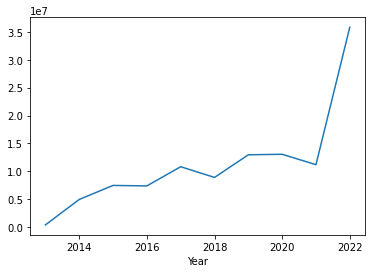

In [23]:
tbl = conn.CASTable('loans_raw')

df = tbl.query('Category = "Mortgage"').head(10)
display(df)

df = tbl.query('Category = "Mortgage"') \
        .groupby('Year') \
        .Amount \
        .sum()

display(df)

df.plot(kind = 'line')